In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("indicators.csv")

In [3]:
df.head()

,MetroArea,PriceChange,LoanPaymentsOverdue
0,Atlanta,1.2,4.55
1,Boston,-3.4,3.31
2,Chicago,-0.9,2.99
3,Dallas,0.8,4.26
4,Denver,-0.7,3.56


In [4]:
y = df["PriceChange"]
x = df["LoanPaymentsOverdue"]

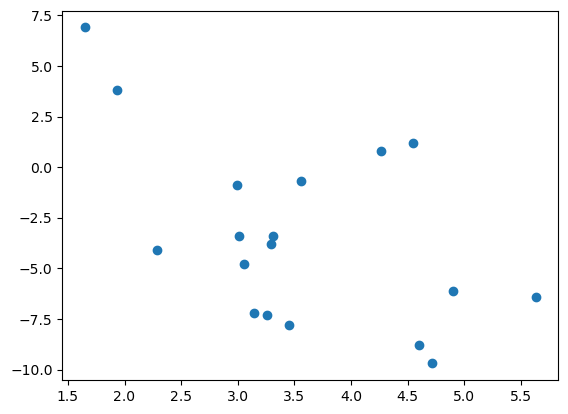

In [5]:
#negative relationship?
plt.scatter(x, y)
plt.show()

In [6]:
X = sm.add_constant(x)
SLR = sm.OLS(y, X).fit()

In [7]:
SLR.summary()

C:\Users\jmeek\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PriceChange   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     6.196
Date:                Sun, 01 Feb 2026   Prob (F-statistic):             0.0242
Time:                        19:33:00   Log-Likelihood:                -49.226
No. Observations:                  18   AIC:                             102.5
Df Residuals:                      16   BIC:                             104.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.5145      3.324      1.358      0.193      -2.532      11.561
LoanPaymentsOverdue    -2.2485      0.903     -2.489      0.024      -4.163      -0.334
==============================================================================
Omnibus:                        2.121   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.403
Skew:                           0.448   Prob(JB):                        0.496
Kurtosis:                       1.966   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
SLR.conf_int(alpha=.05)

,0,1
const,-2.532112,11.561100
LoanPaymentsOverdue,-4.163454,-0.333585


In [9]:
#E(Y|X=4)
yHat = SLR.get_prediction([1, 4])
#see below for best practice when MLR, involves creating new df

In [10]:
ci = yHat.summary_frame(alpha=0.05)
ci

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-4.479585,1.023283,-6.648849,-2.310322,-13.137838,4.178667


In [11]:
df2 = pd.read_csv("invoices.csv")

In [12]:
df2.head()

,Day,Invoices,Time
0,1,149,2.1
1,2,60,1.8
2,3,188,2.3
3,4,23,0.8
4,5,201,2.7


In [13]:
x2 = df2["Invoices"]
y2 = df2["Time"]

In [14]:
X2=sm.add_constant(x2)
SLR2 = sm.OLS(y2,X2).fit()
SLR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           5.17e-14
Time:                        19:33:03   Log-Likelihood:                -8.2528
No. Observations:                  30   AIC:                             20.51
Df Residuals:                      28   BIC:                             23.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6417      0.122      5.248      0.000       0.391       0.892
Invoices       0.0113      0.001     13.797      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.815   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.341
Skew:                          -0.042   Prob(JB):                        0.511
Kurtosis:                       1.968   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Better format for MLR
X_130 = pd.DataFrame([[1, 130]], columns=['const', 'Invoices'])
yHat2 = SLR2.get_prediction(X_130)
ci2 = yHat2.summary_frame(alpha=0.05)
ci2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.109624,0.060208,1.986293,2.232954,1.422947,2.7963
